<b>Universidade Federal de Pernambuco</b><br>

Programa de Pós-Graduação em Engenharia de Produção<br>

Carlos Jose de Lima<br>
Mestrando, Depto. Engenharia de Produção – Universidade Federal de Pernambuco<br>
Av. da Arquitetura, s/n, Cidade Universitária, Recife – PE CEP: 50740-550<br>
carlos.jlima@ufpe.br<br><br>

Maisa Mendonça Silva<br>
Professora Assistente, Depto. Engenharia de Produção – Universidade Federal de Pernambuco<br>
Av. da Arquitetura, s/n, Cidade Universitária, Recife – PE CEP: 50740-550<br>
maisa@cdsid.org.br<br>


<p align = 'justify'>Este arquivo com o código fonte, é parte integrante do artigo entitulado Aplicando os valores de Shapley com técnicas de aprendizado de máquina na análise de investimentos no mercado imobiliário.</p>

<p align = 'justify'>Para replicar o código, se faz necessário o carregamento da base de dados que consiste em arquivo nomeado `artigo_dados.csv`. As informações sobre as bibliotecas utilizadas estão na seção 1, na seção 2 há as informações de carregamento dos arquivos, e a seção 3 cobre a análise dos dados, na seção 4 realizamos a impressão de gráficos, a seção 5 possui as informações sobre o Aprendizado de Máquina, ao final temos bibliografia.</p>

## 1. Bibliotecas utilizadas

As bibliotecas que serão utilizadas ao longo desta atividade serão descritas brevemente, é importante destacar que não compete a presente atividade uma descrição aprofundada sobre as funcionalidades de cada biblioteca, contudo segue a descrição para entendimento.

*   <b>OS<a href='#id_1'>[1]</a></b>: permite a utilização de diversas funcionalidades do sistema operacional, sendo utilizada para carregamento de arquivos no ambiente do Google Colab, entre outros;
*   <b>Pandas<a href='#id_2'>[2]</a></b>: possibilita de forma simples e flexivel a manipulação de estruturas de dados, com dados de diferentes tipos, que possibilita a análise de dados;
*   <b>SHAP<a href='#id_3'>[3]</a></b>: consiste em uma biblioteca baseada em Teoria dos Jogos que utiliza os valores de Shapley;
*   <b>Seaborn<a href='#id_4'>[4]</a></b>: biblioteca de visualização de dados que permitem diversos gráficos e abordagens estatísticas;
*   <b>Matplotlib<a href='#id_5'>[5]</a></b>: biblioteca de visualização que permite criar gráficos interativos ou estatícos, e visualização de dados;
*   <b>Scikit-Learn<a href='#id_6'>[6]</a></b>: uma biblioteca de aprendizado de máquina que suporta aprendizado supervisionado e não supervisionado, com várias ferramentas para ajuste, seleção, avaliação do modelo;

É importante destacar que foi utilizada a linguagem de Programação <b>Python<a href='#id_7'>[7]</a></b> para desenvolvimento das funções e utilização de bibliotecas nativas da linuagem. O ambiente do <b>Google Colab<a href='#id_8'>[8]</a></b> possue de forma nativa todas bibliotecas aqui utilizadas, exceto a Biblioteca SHAP, por o primeiro passo é a instalação para possibilitar o uso, a instalação é feita utilizando um comando `pip` o que permitirá o uso.

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 6.6 MB/s eta 0:00:00


Após instalação vamos importar as bibliotecas que serão utilizadas.

In [2]:
# biblioteca de manipulação de dados
import pandas as pd
import io

# biblioteca de aprendizado de máquina
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# biblioteca de visualização de dados - gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# biblioteca aprendizado de máquina
import shap

## 2. Carregamento dos dados

Após a importação das bibliotecas, vamos adicionar a nossa base de dados a este ambiente. Para tal, iremos utilizar a bibliote `files` do Google Colab. Isso possibilitará a visualização de uma caixa de seleção, escolheremos o arquivo nomeado `artigo_dados.csv` disponível em conjunto com este que contém o código fonte.<br> 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving artigo_dados.csv to artigo_dados.csv


Após carregamento do arquivo, se faz necessário, que sejam importados para uma estrutura de dados utilizando a biblioteca do `Pandas`. Essa importação permitirá a manipulação destes dados, bem como, a utilização das demais funções.Por padrão iremos chamar de `df`, abreviação de `dataFrame`, esta estrutura.

In [4]:
# criação de uma estrutura de DataFrame (df) e leitura do arquivo
df = pd.read_csv(io.BytesIO(uploaded['artigo_dados.csv']))

## 3. Análise Exploratória

Vamos utilizar o método `head()` do Pandas para exibir os primeiros registros existentes na planilha.

In [5]:
df.head()

,Cidade_UF,Bairro,Taxa Desocupação Cidade,PIB Per Capita,Preço m2
0,São Paulo - SP,Itaim Bibi,9.0,60750,15564
1,São Paulo - SP,Pinheiros,9.0,60750,14898
2,São Paulo - SP,Jardins,9.0,60750,13896
3,São Paulo - SP,Moema,9.0,60750,13442
4,São Paulo - SP,Vila Mariana,9.0,60750,12116


Para identificar os tipos de dados existentes valos utilizar o método `info()` do Pandas, que irá nos fornecer as informações de cada tipo de acordo com as colunas existentes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cidade_UF                157 non-null    object 
 1   Bairro                   157 non-null    object 
 2   Taxa Desocupação Cidade  157 non-null    float64
 3   PIB Per Capita           157 non-null    int64  
 4   Preço m2                 157 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 6.3+ KB


Podemos observar que os dados possuem 157 (cento e cinquenta e sete) registros, não nulos, sendo os dados do tipo numérico racionais e inteiros, todos positivos, bem como duas colunas com registro do tipo objeto.

Desta forma para compor o dicionário de dados temos:

>  _coluna | tipo do dado | formato_dado_:

```
Coluna01 | Cidade_UF | Categórico Nominal
Coluna02 | Bairro | Categórico Nominal
Coluna03 | Taxa Desocupação Cidade | Númerico Quantitativo Continuo com uma decimais
Coluna04 | PIB Per Capita | Númerico Quantitativo Continuo sem casas decimais
Coluna05 | Preço m2 | Númerico Quantitativo Continuo sem casas decimais



As dimensões, ou seja, a quantidade de linhas e colunas que existem nos dados são uma medida importante para compreender de que forma precisam ser tratados para o Aprendizado de Máquina. Vamos utilizar a propriedade `shape` para entender o tamanho dessas dimensões.

In [7]:
df.shape

(157, 5)

Podemos observar que os dados em questão possuem cinco dimensões.<br> 

Vamos utilizar o laço de repetição for, para exibição de itens vazio na estrutura do dataframe, apenas para validar que não há valores ausentes.<br>

In [8]:
for col in df.columns:
  n_missing = sum(df[col].isnull())
  print(f'Coluna {col}: {n_missing} valores ausentes')

Coluna Cidade_UF: 0 valores ausentes
Coluna Bairro: 0 valores ausentes
Coluna Taxa Desocupação Cidade: 0 valores ausentes
Coluna PIB Per Capita: 0 valores ausentes
Coluna Preço m2: 0 valores ausentes


## 4. Gráficos para Análise

Nesta seção iremos realizar a impressão de gráficos para análisar informações da base de dados. O primeiro gráfico de dispersão ajuda a compreender a relação entre o preço por metro quadro e as variáveis independentes (taxa de desocupação e PIB per capita), onde cada ponto possui a relação pelo valor das variáveis independentes com o preço do metro quadrado.<br>

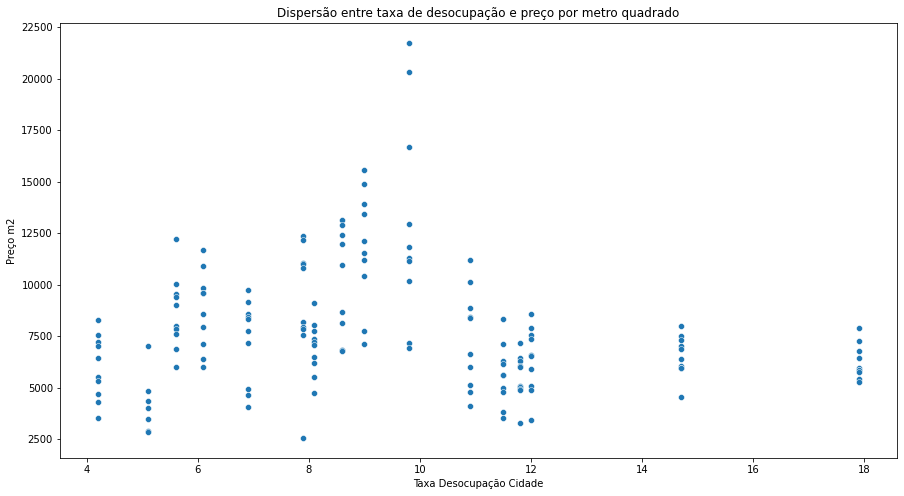

In [10]:
# Gráfico de dispersão entre taxa de desocupação e preço m2
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Taxa Desocupação Cidade', y='Preço m2')
plt.title('Dispersão entre taxa de desocupação e preço por metro quadrado')
plt.show()

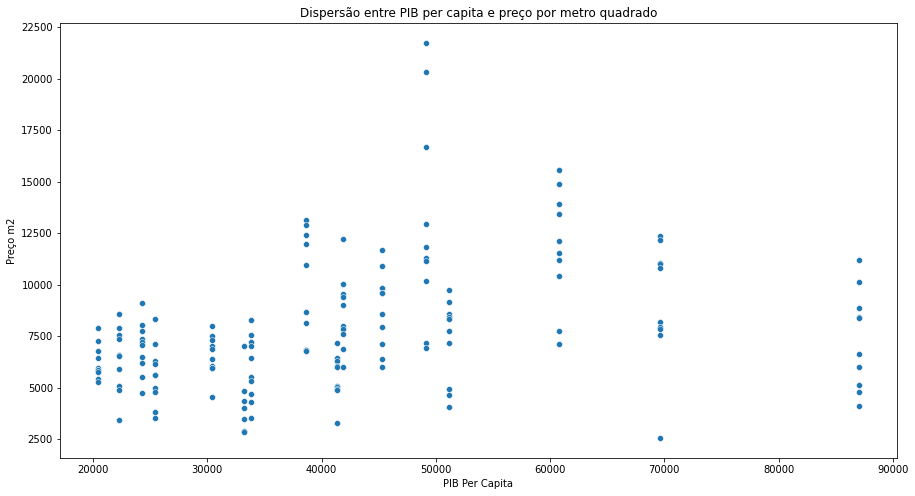

In [11]:
# Gráfico de dispersão entre PIB per capita e preço m2
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='PIB Per Capita', y='Preço m2')
plt.title('Dispersão entre PIB per capita e preço por metro quadrado')
plt.show()

Vamos imprimir um gráfico de barras e desta forma visualizar a média do preço do metro quadrado por Cidade/UF. Para tal, iremos tirar a média de preço da coluna Bairro repassando a uma variável, em seguida, iremos imprimir utilizando a variável como informações dos dados.<br>

In [14]:
df_media_m2 = df.groupby('Cidade_UF')['Preço m2'].mean().reset_index()

Após calcular a média, vamos realizar a impressão do gráfico de barras.

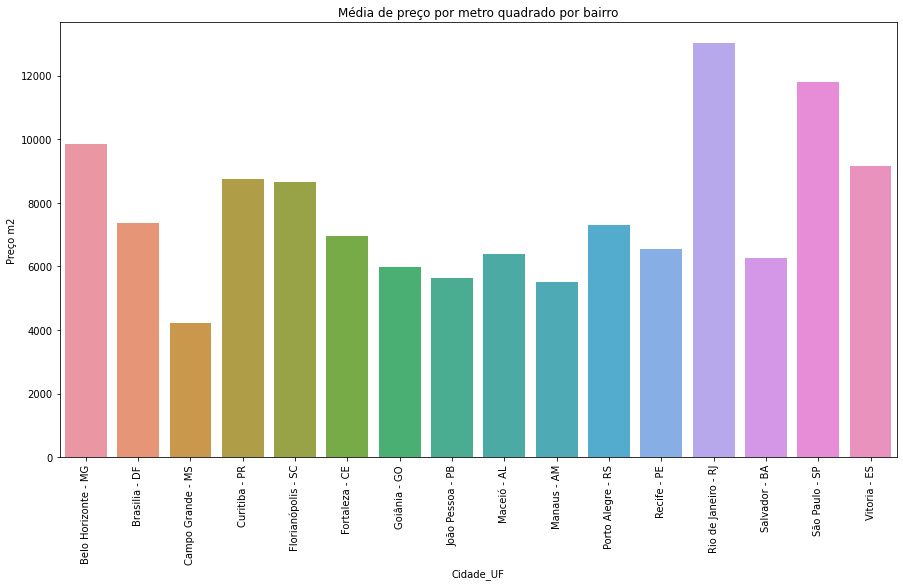

In [15]:
# Gráfico de barras com a média de preço m2 por bairro
plt.figure(figsize=(15, 8))
sns.barplot(data=df_media_m2, x='Cidade_UF', y='Preço m2')
plt.xticks(rotation=90)
plt.title('Média de preço por metro quadrado por bairro')
plt.show()

## 5. Aprendizado de Máquina para valores de Shapley

Vamos utilizar a biblioteca do Scikit-Learn para realizar a divisão para os conjuntos de treinamento e teste e a normalização de dados<a href='#id_9'>[9]</a></b>. A divisão é feita utilizando o método `train_test_split`. Antes haverá a criação de duas variáveis que utilizarão dos dados por padrão na indústria o X é representado em maiúsculo e o y em minúsculo, o primeiro representa as características, e os rótulos/classes no segundo.<br>

Vamos utilizar 20% da amostra para teste, e o restante da amostra para treinamento, isso é feito repassando o parâmetro `test_size` no método. O valor de random_state é escolhido de forma aletória, mas é comumente utilizado o valor igual a 42<a href='#id_9'>[9]</a></b>.

In [30]:
X = df[['Taxa Desocupação Cidade', 'PIB Per Capita']]
y = df['Preço m2']

Após a divisão das variáveis 

In [31]:
# Dividir dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Depois, ajustamos um modelo de regressão utilizando o `RandomForestRegressor`.

In [32]:
# Ajustar modelo de regressão
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Em seguida, podemos calcular os valores de Shapley usando o método `permutation_importance` do Scikit-Learn.

In [33]:
# Calcular Shapley Values
shap_values = permutation_importance(regressor, X_test, y_test, n_repeats=10, random_state=42)

Por fim, podemos imprimir os valores de Shapley para cada variável:

In [34]:
# Imprimir valores de Shapley
for i in range(X.shape[1]):
    print(f'{X.columns[i]}: {shap_values.importances_mean[i]:.2f}')

Taxa Desocupação Cidade: -0.01
PIB Per Capita: 0.11


Os valores de Shapley indicam a contribuição marginal de cada variável na predição do modelo em relação à variável alvo.<br>

Os resultados apresentados demonstram que "Taxa Desocupação Cidade" é negativo (-0.01), o que sugere que o aumento dessa variável tende a diminuir o valor da variável alvo (preço do metro quadrado). Por outro lado, o valor de Shapley para "PIB Per Capita" é positivo (0.11), indicando que o aumento dessa variável tende a aumentar o valor da variável alvo.<br>

Desta forma podemos compreender que o PIB per capita é uma variável com maior importância na determinação do preço do metro do quadrado do que a taxa de desocupação.<br>

Fizemos a utilização dos valores de Shapley utilizando a biblioteca do Scikit-Learn, vamos realizar a mesma abordagem com a biblioteca SHAP. O gráfico a seguir demonstra o impacto que cada um das variáveis independentes (PIB Per Capita e Taxa Desocupação Cidade) possuem nas observações.<br>

In [38]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Vamos utilizar o summary_plot da biblioteca SHAP para compreender o impacto médio de cada variável no modelo.

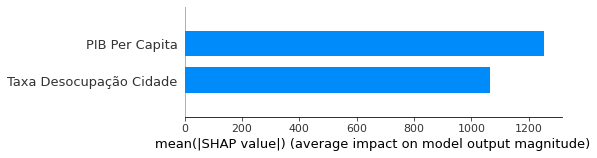

In [43]:
shap_values = shap.TreeExplainer(regressor).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

No gráfico a seguir temos a representação observando cada ponto do conjunto de dados. Os pontos horizontais são interpretados como o impacto da variável no modelo, enquanto a cor demonstra o valor da própria variável. Na lateral do gráfico podemos observar que as variáveis de mais importância estão na parte superior.

A barra veritical de cada um dos pontos demonstra o intervalo de confiança para cada valor, desta forma temos a incerteza da estimativa da variável na predição, sabendo-se que quanto mais larga for a barra vertical maior a incerteza a ela atribuída.<br>

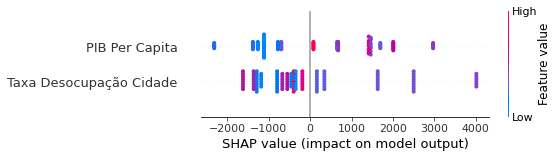

In [40]:
shap.summary_plot(shap_values, X_train)

Vamos imprimir um gráfico para examinar a relação do PIB Per Capita com a Taxa de Desocupação com os valores de Shapley. Aqui visualizamos como a primeira variável afeta o resultados encontrados no modelo, mostrando também a distribuição dos valores no modelo.

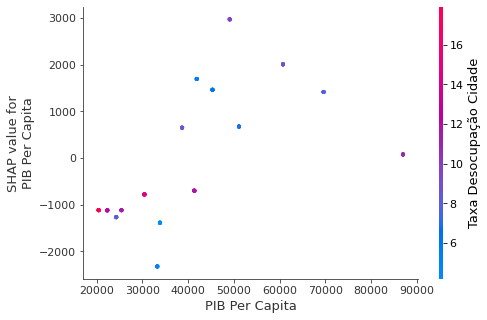

In [41]:
shap.dependence_plot('PIB Per Capita', shap_values, X_train)

Estamos aqui invertendo a relação, e visualizando a contribução da Taxa de Desocupação com o PIB Per Capita.

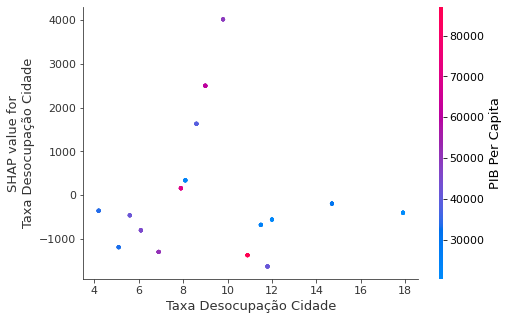

In [42]:
shap.dependence_plot('Taxa Desocupação Cidade', shap_values, X_train)

## Bibliografia

<p align = 'justify'>
<a name="id_1">[1]</a> Biblioteca OS Documentação do Python. Disponível em <'https://docs.python.org/3/library/os.html'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_2">[2]</a> Biblioteca do Pandas. Disponível em <'https://shap.readthedocs.io/en/latest/#'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_3">[3]</a> Biblioteca SHAP. Disponível em <'https://numpy.org/doc/stable/'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_4">[4]</a> Biblioteca Searborn. Disponível em <'https://seaborn.pydata.org'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_5">[5]</a> Biblioteca Matplotlib. Disponível em <'https://matplotlib.org'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_6">[6]</a> Biblioteca do Scikit-Learn. Disponível em <'https://scikit-learn.org/stable/#'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_7">[7]</a> Python. Disponível em <'https://www.python.org/'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_8">[8]</a> Google Colab. Disponível em <'https://colab.research.google.com/notebooks/intro.ipynb'>. Acesso em 14/02/2023.</p>

<p align = 'justify'>
<a name="id_9">[9]</a> GÉRON, Aurélien. <b>Mãos a obra</b>: Aprendizado de Máquina com Scikit-Learn & TensorFlow. Altas Book: Rio de Janeiro - RJ, 2019.</p>

